# Image segmentation
---

Grouping, or segmenting, images into distinct parts according to a set of features is known as image segmentation.

The simplest case for image segmentation is in background subtraction. In video and other applications, it is often the case that a human has to be isolated from a static or moving background, and so we have to use segmentation methods to distinguish these areas. Image segmentation is also used in a variety of complex recognition tasks, such as in classifying every pixel in an image of the road.

![Segmentation](images/image_segmentation.jpeg)

### Image contours
---

Edge detection algorithms are often used to detect the boundaries of objects. But, after performing edge detection you'll often be left with sets of edges that highlight not only object boundaries but also interesting features and lines. And to do image segmentation, you'll want only complete closed boundaries that marked distinct areas and objects in an image. One technique that's useful for this is called, Image Contouring.

Image contours, are continuous curves that follow the edges along a perceived boundary. So contours can be used for image segmentation and they can also provide a lot of information about the shape of an object boundary.

#### Basic imports

In [79]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import math

#### Load and produce a binary image

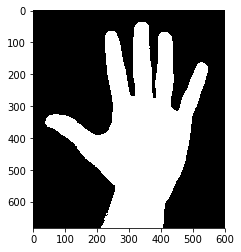

In [80]:
hand = cv2.cvtColor(cv2.imread("images/hand.jpeg"), cv2.COLOR_BGR2RGB)
gray_hand = cv2.cvtColor(hand, cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(gray_hand, 250, 255, cv2.THRESH_BINARY_INV)
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, np.ones((5,5)))

plt.imshow(binary, cmap="gray")

#### Find and draw the contours

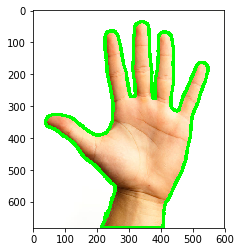

In [81]:
# Find contours in binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

hand_copy = np.copy(hand)

all_contours = cv2.drawContours(hand_copy, contours, -1, (0,255,0), 10)

plt.imshow(all_contours)


#### Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in [OpenCV documentation, here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html).

We will identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down.

#### Orientation

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the `angle` from that shape.
 
```python
# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up.

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

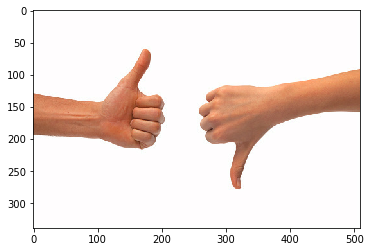

In [82]:
# Read in the image
image = cv2.imread('images/thumbs_up_down.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

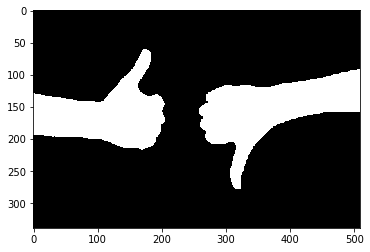

In [83]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

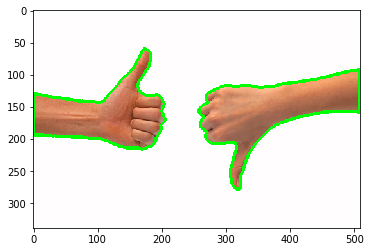

In [84]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [85]:
# Create an empty list to store the angles in
angles = []
    
for contour in contours:
    (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
    angles.append(angle)
    
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


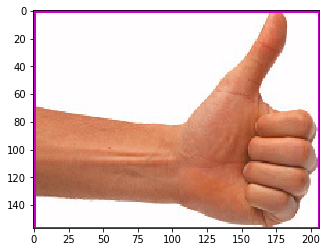

In [86]:
# Isolate a part of the image based on the contours
selected_contour = contours[angles.index(max(angles))]

if(selected_contour is not None):
    cropped_image = np.copy(image)
    
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)

    # Draw the bounding rectangle as a purple box
    box_image = cv2.rectangle(cropped_image, (x,y), (x+w,y+h), (200,0,200),2)
    
    cropped_image = cropped_image[y: y + h, x: x + w] 
    plt.imshow(cropped_image)

### Kmeans clustering
---

It's a machine learning technique that separates an image into segments by clustering or grouping together data points that have similar traits. K-means is called an unsupervised learning method which means you don't need to label data. Instead, unsupervised learning aims to group and characterize unlabeled datasets. And, in doing so, often identifies patterns and similarities in groups of data.

You can give k-means a set of any unlabeled data, like the pixel values in an image, and just tell it to break it into k clusters where k is a variable whose value you choose.

![Kmeans](images/k_means.png)

#### Load and display image

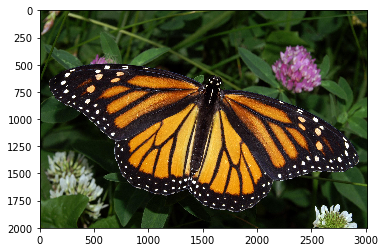

In [87]:
kmeans_image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
kmeans_image = cv2.cvtColor(kmeans_image, cv2.COLOR_BGR2RGB)

plt.imshow(kmeans_image)

#### Prepare data for k-means

In [88]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = kmeans_image.reshape((-1,3))

print(pixel_vals)

# Convert to float type
pixel_vals = np.float32(pixel_vals)

[[33 66 23]
 [33 66 23]
 [33 66 23]
 ...
 [24 43 11]
 [24 43 11]
 [24 43 11]]


#### Implement k-means clustering

In [89]:
# define stopping criteria
# you can change the number of max iterations for faster convergence
# Iterations: The max amount of times the algorithms runs
# Epsilon: if the the clusters move less than this after some iteration, the algorithm stops
# ( type, max_iter, epsilon ):
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 3
# ( samples, no. clusters, labels for the clusters, criteria, attempts, how initial centers are taken )
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

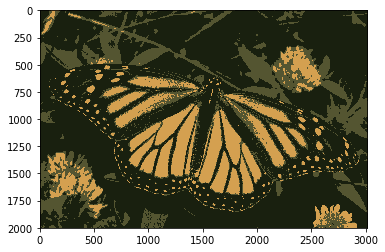

In [90]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((kmeans_image.shape))
labels_reshape = labels.reshape(kmeans_image.shape[0], kmeans_image.shape[1])

plt.imshow(segmented_image)

[0, 1, 2]


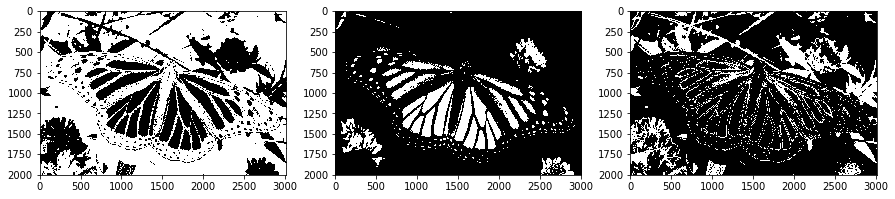

"f, axs = plt.subplots(math.ceil(len(distinct_labels)/3), min([3, len(distinct_labels)]), figsize=(15,7.5))\nprint(axs)\nfor row in range(math.ceil(len(distinct_labels)/3)):\n    for col in range(3):\n        axs[row][col].imshow(labels_reshape==distinct_labels[row * 3 + col], cmap='gray')\n"

In [91]:
distinct_labels = list(set(labels.flatten()))

print(distinct_labels)
plt.figure(figsize=(15,5))
for i in range(len(distinct_labels)):
    plt.subplot(math.ceil(len(distinct_labels)/3), 3, i+1)
    plt.imshow(labels_reshape==distinct_labels[i], cmap='gray')
    
plt.show()

'''f, axs = plt.subplots(math.ceil(len(distinct_labels)/3), min([3, len(distinct_labels)]), figsize=(15,7.5))
print(axs)
for row in range(math.ceil(len(distinct_labels)/3)):
    for col in range(3):
        axs[row][col].imshow(labels_reshape==distinct_labels[row * 3 + col], cmap='gray')
'''

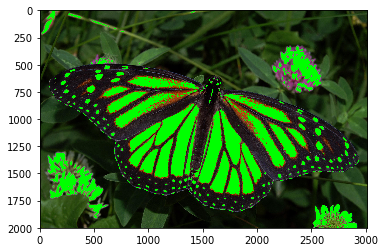

In [93]:
# mask an image segment by cluster

cluster = 1 # the first cluster

masked_image = np.copy(kmeans_image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)